## Predicting Whether the Cancer is Malignant or Benign 

In [1]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout 
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


# Preprocessing of Data

In [2]:
# Loading Dataset 
data = pd.read_csv("Data/Cancer_Data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# Dropping unwanted columns
data = data.drop(['id'],axis=1)

In [4]:
# Checking dataset for null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [5]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
# Encoding 'diagnosis' column data
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
data['diagnosis'] = encode.fit_transform(data['diagnosis'])
data['diagnosis'].head(20)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    0
Name: diagnosis, dtype: int64

'1' represents Malignant and '0' represents Benign

In [7]:
# Seperating Inputs and output from the dataset
In = data.loc[:,'radius_mean':]
out = data.loc[:,['diagnosis']]
# Converting Dataframe into numpy arrays
In = In.to_numpy()
out = out.values

We can use any of the two methods 'to_numpy' or 'values' for converting the dataframe into numpy arrays.

In [8]:
print(In) 
out

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
    

# Feature Scaling 

In [9]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
In = scaler.fit_transform(In)
In

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

# Splitting of Training and Testing datasets

In [10]:
X_train,X_test,y_train,y_test = train_test_split(In, out, train_size=0.75, random_state=42)

In [11]:
X_train,X_test,y_train,y_test

(array([[-0.35140842, -1.43571862, -0.4151574 , ..., -0.9280036 ,
         -0.95733092, -0.81992231],
        [-0.20656118,  0.28631105, -0.13712355, ...,  1.37791231,
          1.10695714,  1.49368807],
        [-0.33152743, -0.23262492, -0.32083185, ..., -0.73888926,
          0.49543607, -0.63594179],
        ...,
        [ 0.04621146, -0.57470379, -0.06874782, ..., -1.23756033,
         -0.71628161, -1.26047806],
        [-0.04183295,  0.07687501, -0.03497186, ...,  1.03683652,
          0.45013821,  1.19444266],
        [-0.5530585 ,  0.28631105, -0.60751564, ..., -0.61357437,
         -0.33448538, -0.84042616]]),
 array([[-0.47069438, -0.16048584, -0.44810956, ..., -0.19956318,
          0.18320441,  0.19695794],
        [ 1.36687747,  0.47014935,  1.30288585, ...,  0.97897545,
         -0.56582801, -1.00057787],
        [ 0.37850807,  0.04429607,  0.40082046, ...,  0.56024403,
         -0.10314275, -0.20813168],
        ...,
        [-0.87683468, -0.57237672, -0.8670139 , ..., -

In [12]:
X_train.shape

(426, 30)

# Tuning Hyperparameters

In [13]:
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 30))
    classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer ='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier


classifier = KerasClassifier(build_fn = build_classifier)

In [14]:
parameters={'batch_size': [10,16,20,24,30], 'epochs' : [100,160,200,250,300]}

In [15]:
#now we will implement gridsearch 

grid=GridSearchCV(estimator=classifier,param_grid=parameters,scoring='accuracy',cv=5,n_jobs=-1)

In [16]:
grid_search=grid.fit(X_train,y_train)

Epoch 1/300
15/15 [==============================] - 0s 947us/step - loss: 0.6916 - accuracy: 0.7254
Epoch 2/300
15/15 [==============================] - 0s 1ms/step - loss: 0.6834 - accuracy: 0.9178
Epoch 3/300
15/15 [==============================] - 0s 1ms/step - loss: 0.6592 - accuracy: 0.9249
Epoch 4/300
15/15 [==============================] - 0s 933us/step - loss: 0.6031 - accuracy: 0.9296
Epoch 5/300
15/15 [==============================] - 0s 903us/step - loss: 0.5277 - accuracy: 0.9390
Epoch 6/300
15/15 [==============================] - 0s 893us/step - loss: 0.4537 - accuracy: 0.9437
Epoch 7/300
15/15 [==============================] - 0s 933us/step - loss: 0.3850 - accuracy: 0.9531
Epoch 8/300
15/15 [==============================] - 0s 902us/step - loss: 0.3197 - accuracy: 0.9601
Epoch 9/300
15/15 [==============================] - 0s 894us/step - loss: 0.2587 - accuracy: 0.9648
Epoch 10/300
15/15 [==============================] - 0s 920us/step - loss: 0.2085 - accuracy: 

In [17]:
best_parameters=grid_search.best_params_
best_parameters

{'batch_size': 30, 'epochs': 300}

# Building Artificial Neural Network Model with optimized hyperparameters

In [18]:
# Initializing the model
classifier = Sequential()

In [19]:
# Creating Input layer for the model
classifier.add(Dense(units=42, activation='relu', kernel_initializer='uniform', input_dim=30))
classifier.add(Dropout(rate=0.1))  # For avoiding Overfitting of data

# Adding the Hidden layer to the model
classifier.add(Dense(units=42, activation='relu', kernel_initializer='uniform'))
classifier.add(Dropout(rate=0.1))

# Adding an output layer
classifier.add(Dense(units=1, activation='sigmoid', kernel_initializer='uniform'))

In [20]:
# Compiling the ANN model
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
# Fitting the data
history=classifier.fit(X_train,y_train,epochs=100,batch_size=30,validation_data = (X_test,y_test))

Epoch 1/100
15/15 [==============================] - 0s 10ms/step - loss: 0.6846 - accuracy: 0.8239 - val_loss: 0.6645 - val_accuracy: 0.9441
Epoch 2/100
15/15 [==============================] - 0s 3ms/step - loss: 0.6278 - accuracy: 0.9202 - val_loss: 0.5512 - val_accuracy: 0.9650
Epoch 3/100
15/15 [==============================] - 0s 3ms/step - loss: 0.4667 - accuracy: 0.9413 - val_loss: 0.3292 - val_accuracy: 0.9580
Epoch 4/100
15/15 [==============================] - 0s 3ms/step - loss: 0.2690 - accuracy: 0.9437 - val_loss: 0.1620 - val_accuracy: 0.9580
Epoch 5/100
15/15 [==============================] - 0s 3ms/step - loss: 0.1587 - accuracy: 0.9554 - val_loss: 0.0977 - val_accuracy: 0.9790
Epoch 6/100
15/15 [==============================] - 0s 3ms/step - loss: 0.1160 - accuracy: 0.9718 - val_loss: 0.0732 - val_accuracy: 0.9790
Epoch 7/100
15/15 [==============================] - 0s 2ms/step - loss: 0.0936 - accuracy: 0.9742 - val_loss: 0.0628 - val_accuracy: 0.9790
Epoch 8/100


In [24]:
# Computing accuracy,loss,validation loss and accuracy
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [25]:
epochs = range(len(loss))
epochs

range(0, 100)

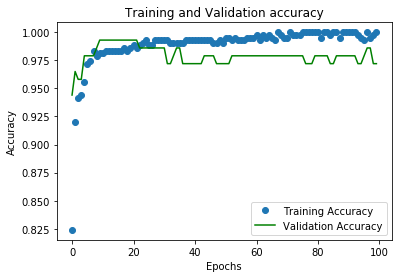

In [26]:
# Plot between epochs and accuracy
plt.plot(epochs, accuracy, 'o', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'g', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

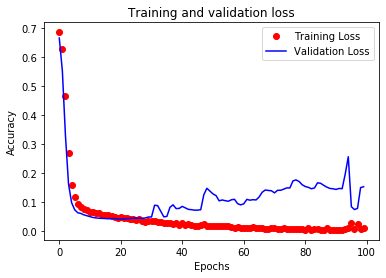

In [27]:
# Plot between epochs and loss
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Predicting Values and Calculating accuracy using Confusion Matrix

In [28]:
y_pred = classifier.predict(X_test) > 0.5

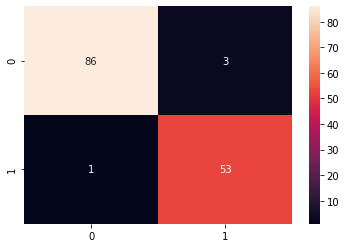

In [29]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

In [30]:
print("Accuracy : ",round((cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])*100,2))

Accuracy :  97.2


So, This model was '97.2' percent accurate.